# Математическая статистика
## Практическое задание 0

В данном задании предлагается решить 4 простых задачи на использование функций библиотеки `numpy`. Хоть само задание и не относится к курсу статистики, оно является важным в условиях отсутствия курса по Питону. Решение этих задач поможет научить писать простой и понятный код, работающий при этом в десятки или даже в сотни раз быстрее. Нам же это облегчит процесс проверки.

**Правила:**

* Задание считается выполненным, если решено *не менее трех задач*.
* Успешное выполнение задание является допуском для выполнения следующих практических заданий.
* В случае неуспешного выполнения задания допускаются две попытки повторной сдачи. Мы будем стараться отвечать в течении трех дней.
* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 0"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `0.N.ipynb` и `0.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* В данном задании весь присылаемый код должен корректно работать на `Python 3.5`.


Во всех заданиях предполагается, что все аргументы функций, которые нужно реализовать, имеют тип `numpy.array` либо являются числами. Возвращать нужно также либо `numpy.array`, либо число. Кроме того, предполагается, что все аргументы корректны, и проверять их на корректность не нужно.

При реализации запрещается пользоваться любыми циклами, в том числе стандартными функциями языка, которые заменяют циклы. Можно использовать любые функции библиотек `numpy` или `scipy`, кроме функции `numpy.fromfunction` и декторатора `numpy.vectorize`.

In [3]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

**Задача 1.** Напишите функцию, реализующую матричное умножение. При вычислении разрешается создавать объекты размерности три. Запрещается пользоваться функциями, реализующими матричное умножение (`numpy.dot`, операция `@`, операция умножения в классе `numpy.matrix`). *Авторское решение занимает одну строчку.*

In [106]:
def matrix_multiplication(A, B):
    A_tmp = np.tile(A, (B.shape[1], 1))
    B_tmp = np.tile(B.T, (1, A.shape[0])).reshape(np.array([B.shape[1], 1]) * np.array(A.shape))
    return (A_tmp * B_tmp).sum(axis=1).reshape((B.shape[1], A.shape[0])).T

In [107]:
matrix_multiplication(sps.uniform.rvs(size=(10, 20)), sps.uniform.rvs(size=(20, 30))).shape

(10, 30)

Проверьте правильность реализации на случайных матрицах. Должен получится ноль.

In [108]:
A = sps.uniform.rvs(size=(10, 20))
B = sps.uniform.rvs(size=(20, 30))
np.abs(matrix_multiplication(A, B) - A @ B).sum()

1.496580637194711e-13

А вот в таком стиле вы присылали бы нам свои работы, если не стали бы делать это задание.

In [109]:
def stupid_matrix_multiplication(A, B):
    C = [[0 for j in range(len(B[0]))] for i in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
    return C

Проверьте, насколько быстрее работает ваш код по сравнению с неэффективной реализацией `stupid_matrix_multiplication`. Эффективный код должен работать почти в 200 раз быстрее. Для примера посмотрите также, насколько быстрее работают встроенные `numpy`-функции.

In [110]:
A = sps.uniform.rvs(size=(400, 200))
B = sps.uniform.rvs(size=(200, 300))

%time C1 = matrix_multiplication(A, B)
%time C2 = A @ B  # python 3.5
%time C3 = np.matrix(A) * np.matrix(B)
%time C4 = stupid_matrix_multiplication(A, B)

CPU times: user 185 ms, sys: 203 ms, total: 389 ms
Wall time: 422 ms
CPU times: user 3.67 ms, sys: 4.31 ms, total: 7.97 ms
Wall time: 22.4 ms
CPU times: user 29.4 ms, sys: 2.43 ms, total: 31.8 ms
Wall time: 9.56 ms
CPU times: user 17.3 s, sys: 143 ms, total: 17.4 s
Wall time: 17.5 s


Ниже для примера приведена полная реализация функции. Ваc мы, конечно, не будем требовать проверять входные данные на корректность, но документации к функциям нужно писать.

In [111]:
def matrix_multiplication(A, B):
    '''Возвращает матрицу, которая является результатом
    матричного умножения матриц A и B.
    
    '''
    
    # Если A или B имеют другой тип, нужно выполнить преобразование типов
    A = np.array(A)
    B = np.array(B)
    
    # Проверка данных входных данных на корректность
    assert A.ndim == 2 and B.ndim == 2, 'Размер матриц не равен 2'
    assert A.shape[1] == B.shape[0], ('Матрицы размерностей '
                                      '{} и {} неперемножаемы'.format(A.shape,
                                                                      B.shape))
    B_tmp = np.tile(B.T, (1, A.shape[0])).reshape(np.array([B.shape[1], 1]) * np.array(A.shape))
    A_tmp = np.tile(A, (B.shape[1], 1))
    C = (A_tmp * B_tmp).sum(axis=1).reshape((B.shape[1], A.shape[0])).T
    return C

**Задача 2.** Напишите функцию, которая по входной последовательности $X = (X_1, ..., X_n)$ строит последовательность $S = (S_1, ..., S_n)$, где $S_k = \frac{X_1 + ... + X_k}{k}$.  *Авторское решение занимает одну строчку.*

In [112]:
def cumavg(X):
    return np.cumsum(X) / np.arange(1, len(X) + 1, dtype=int)

Постройте график зависимости $S_k$ от $k$. График должен быть в виде ломанной линии с достаточно крупными точками. Размер фигуры 15 на 5, сетка в виде пунктирной линии.

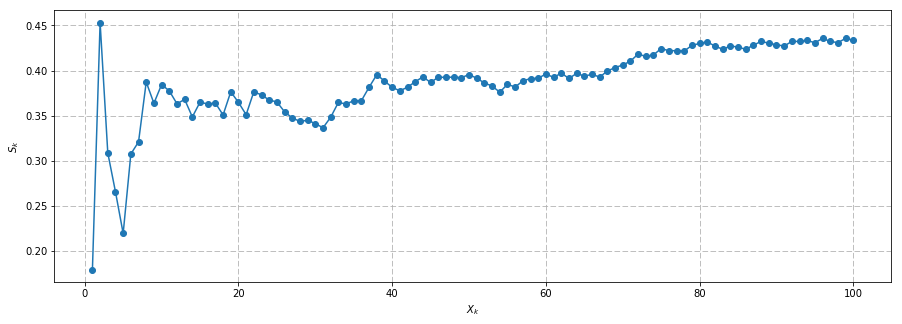

In [113]:
S = cumavg(sps.uniform.rvs(size=100))

plt.figure(figsize=(15, 5))
plt.plot(np.arange(1, len(S) + 1, dtype=int), S, '-o')
plt.xlabel("$X_k$")
plt.ylabel("$S_k$")
plt.grid(ls='--')
plt.show()

Проверьте корректность работы реализации, а также ее эффективность. Эффективный код должен работать в 50 раз быстрее.

In [114]:
def stupid_cumavg(X):
    S = [0 for i in range(len(X))]
    for i in range(len(X)):
        S[i] = X[i] + S[i - 1]
    for i in range(len(X)):
        S[i] /= i + 1
    return S

X = sps.uniform.rvs(size=10 ** 7)

%time S1 = cumavg(X)
%time S2 = stupid_cumavg(X)

np.abs(S1 - S2).sum()

CPU times: user 85.3 ms, sys: 35.5 ms, total: 121 ms
Wall time: 121 ms
CPU times: user 5.95 s, sys: 162 ms, total: 6.11 s
Wall time: 6.13 s


0.0

**Задача 3.** Дана матрица $A = (a_{ij})$ размера $n \times m$. Вычислите величину $$\frac{1}{m} \sum_{j=1}^m \min_{i=1, ..., n} a_{ij},$$ то есть средний минимум по столбцам. *Авторское решение занимает одну строчку.*

In [115]:
def avgmin(A):
    return np.min(A, axis=0).mean()

Проверьте корректность работы реализации, а также ее эффективность. Эффективный код должен работать почти в 200 раз быстрее. Обратите внимание, что разность чисел может быть не равна нулю из-за ошибок округления, но должна иметь малый порядок.

In [116]:
def stupid_avgmin(A):
    N, M = len(A), len(A[0])
    min_col = [min([A[i][j] for i in range(N)]) for j in range(M)]
    return sum(min_col) / M

N, M = 5000, 10000
A = sps.uniform.rvs(size=(N, M))

%time S1 = avgmin(A)
%time S2 = stupid_avgmin(A)

print(np.abs(S1 - S2))

CPU times: user 102 ms, sys: 11.1 ms, total: 113 ms
Wall time: 115 ms
CPU times: user 17.5 s, sys: 262 ms, total: 17.8 s
Wall time: 18 s
4.87890977618e-19


**Задача 4.** Дан массив $X$. Требуется построить новый массив, в котором все четные элементы $X$ заменить на число $v$ (если оно не указано, то на ноль). Все нечетные элементы исходного массива нужно возвести в квадрат и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений.

In [117]:
def func4(X, v=0):
    responce_X = X.copy()
    responce_X[responce_X % 2 == 0] = v
    responce_X[responce_X % 2 == 1]  = (responce_X[responce_X % 2 == 1] ** 2)[::-1]
    return responce_X

Проверьте корректность работы реализации, а также ее эффективность. Эффективный код должен работать в 20 раз быстрее.

In [118]:
def stupid_func4(X, v=0):
    odd = [elem ** 2 for elem in X if elem % 2]
    
    new_X = []
    j = len(odd) - 1
    for i in range(len(X)):
        if X[i] % 2:
            new_X.append(odd[j])
            j -= 1
        else:
            new_X.append(v)
    
    return new_X

X = sps.randint.rvs(size=10 ** 7, low=0, high=100)

%time A1 = func4(X)
%time A2 = stupid_func4(X)

np.abs(A1 - A2).sum()

CPU times: user 794 ms, sys: 101 ms, total: 895 ms
Wall time: 902 ms
CPU times: user 7.17 s, sys: 281 ms, total: 7.45 s
Wall time: 7.54 s


0

**Вопрос:** За счет чего достигается такая эффективность методов `numpy`?

**Ответ:** Львиная доля времени тратится в библиотечных функциях, написанных на C.